In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helpers import calc_exp_wait

# Initializing Data

---

In [4]:
# read all data
dfs_MM1, dfs_MM2, dfs_MM4 = [], [], []
MM_df_lists = [dfs_MM1, dfs_MM2, dfs_MM4]
rho_values = np.array([0.05, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99])
service_rate = 2
n_servers = [1, 2, 4]

for rho in rho_values:
    for n, df_list in zip(n_servers, MM_df_lists):
        title = f"averages_MM{n}_n250_rho{rho}_max_runtime100000"
        df_list.append(pd.read_csv(f'./data/simulation_averages/{title}.csv', names=['waiting_times', 'queue_lengths'], skiprows=1))

dfs_MM1[0]

,waiting_times,queue_lengths
0,0.025465,0.001733
1,0.022978,0.002119
2,0.026423,0.002822
3,0.024011,0.003200
4,0.024235,0.002313
...,...,...
245,0.026895,0.003300
246,0.027334,0.002204
247,0.025864,0.003620
248,0.024201,0.002200


# Comparison of M/M/1, M/M/2, M/M/4 to theory

---

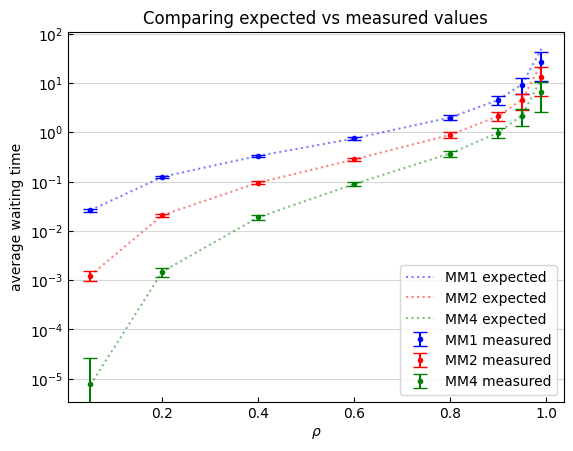

In [3]:
colors = ['blue', 'red', 'green']

for i, df_list in enumerate(MM_df_lists):
    measured_waiting_times = [np.mean(df["waiting_times"]) for df in df_list]
    waiting_stds = np.array([np.std(df["waiting_times"]) for df in df_list])

    n = i+1 if i != 2 else 4
    legend_label = f"MM{n}"
    expected_waiting_times = calc_exp_wait(rho=rho_values, c=n, service_rate=service_rate)
    
    plt.plot(rho_values, expected_waiting_times, label=legend_label+" expected", linestyle='dotted', color=colors[i], alpha=0.5)
    plt.errorbar(rho_values, measured_waiting_times, yerr=waiting_stds, fmt='.', capsize=5, label=legend_label+" measured", color=colors[i])

plt.legend()
plt.yscale('log')
plt.xlabel('$\\rho$')
plt.ylabel("average waiting time")
plt.title("Comparing expected vs measured values")
plt.tick_params(direction='in')
plt.grid(axis='y', alpha=0.5)
plt.minorticks_off()
plt.show()

In [4]:
# read new data
dfs_MD1, dfs_MD2, dfs_MD4 = [], [], []
dfs_MM1_SJF, dfs_MM2_SJF, dfs_MM4_SJF = [], [], []
dfs_MH1, dfs_MH2, dfs_MH4 = [], [], []

MD_df_lists = [dfs_MD1, dfs_MD2, dfs_MD4]
MH_df_lists = [dfs_MH1, dfs_MH2, dfs_MH4]
MM1_SJF_df_lists = [dfs_MM1_SJF, dfs_MM2_SJF, dfs_MM4_SJF]

for rho in rho_values:
    for n, MD_df_list, SJF_df_list, MH_df_list in zip(n_servers, MD_df_lists, MM1_SJF_df_lists, MH_df_lists):
        title = f"averages_MD{n}_n250_rho{rho}_max_runtime100000_FIFO"
        MD_df_list.append(pd.read_csv(f'./data/simulation_averages/{title}.csv', names=['waiting_times', 'queue_lengths'], skiprows=1))
        
        title = f"averages_MM{n}_n250_rho{rho}_max_runtime100000_SJF"
        SJF_df_list.append(pd.read_csv(f'./data/simulation_averages/{title}.csv', names=['waiting_times', 'queue_lengths'], skiprows=1))

        title = f"averages_MH{n}_n250_rho{rho}_max_runtime100000_FIFO"
        MH_df_list.append(pd.read_csv(f'./data/simulation_averages/{title}.csv', names=['waiting_times', 'queue_lengths'], skiprows=1))

# Comparing Queueing System Waiting Times

---

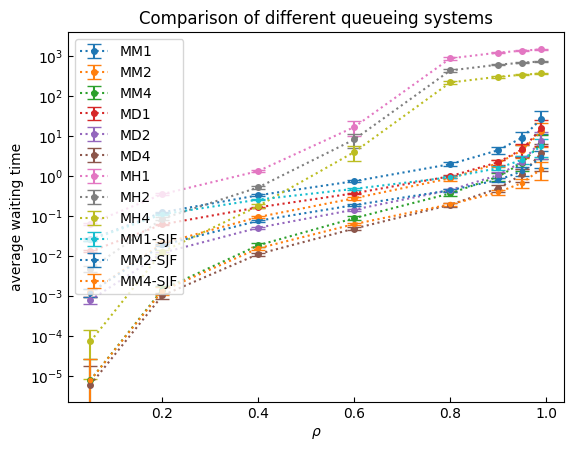

In [5]:
plt.figure()

def plot_one_df_list(df_list, i, label):
    measured_waiting_times = [np.mean(df["waiting_times"]) for df in df_list]
    waiting_stds = np.array([np.std(df["waiting_times"]) for df in df_list])

    n = i + 1 if i != 2 else 4
    legend_label = f"M/M/{n}-SJF" if label=="SJF" else f'{label}{n}'
    plt.errorbar(rho_values, measured_waiting_times, yerr=waiting_stds, fmt='o', capsize=5, label=legend_label, linestyle='dotted', markersize=4)

def plot_df_lists(df_lists, label):
    for i, df_list in enumerate(df_lists):
        plot_one_df_list(df_list, i, label)

plot_df_lists(MM_df_lists, label="MM")
plot_df_lists(MD_df_lists, label="MD")
plot_df_lists(MH_df_lists, label="MH")

# MM1-SJF, MM2-SJF, MM4-SJF
for i, df_list in enumerate(MM1_SJF_df_lists):
    measured_waiting_times = [np.mean(df["waiting_times"]) for df in df_list]
    waiting_stds = np.array([np.std(df["waiting_times"]) for df in df_list])
    n = i + 1 if i != 2 else 4
    plt.errorbar(rho_values, measured_waiting_times, yerr=waiting_stds, fmt='.', capsize=5, label=f"MM{n}-SJF", linestyle='dotted')

plt.legend(loc='upper left')
plt.yscale('log')
plt.xlabel('$\\rho$')
plt.ylabel("average waiting time")
plt.title("Comparison of different queueing systems")
plt.tick_params(direction='in')
# plt.xlim(0.75, 1)
# plt.ylim(0.1, 5000)
plt.minorticks_off()
plt.show()

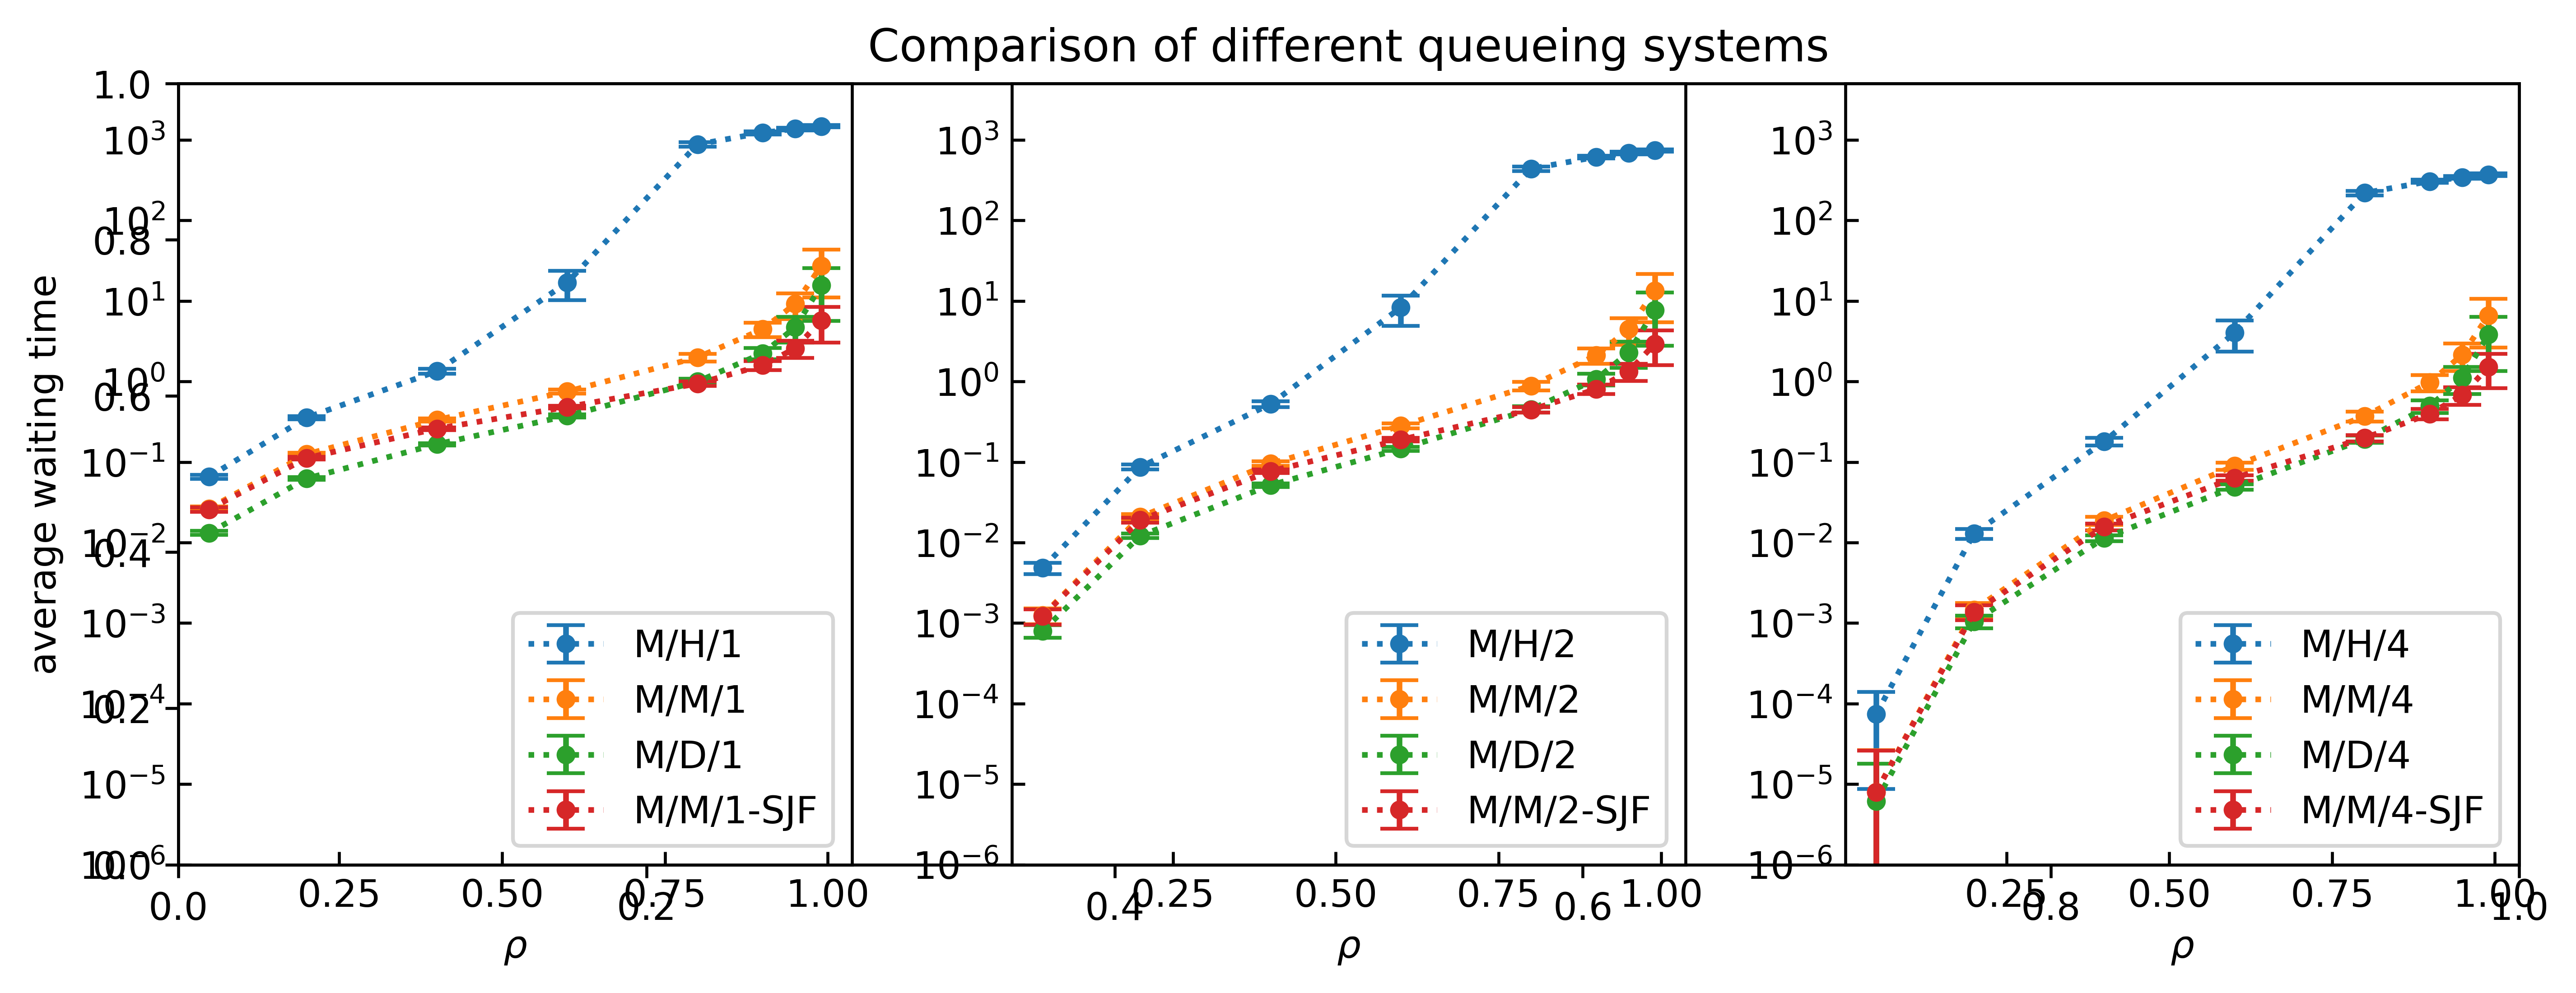

In [6]:
# Plotting per service number
plt.figure(figsize=(10, 4), layout='tight', dpi=600)

plt.title("Comparison of different queueing systems")
for i, dfs in enumerate(zip(MM_df_lists, MD_df_lists, MM1_SJF_df_lists, MH_df_lists)):
    MM_dfs, MD_dfs, SJF_dfs, MH_dfs = dfs
    plt.subplot(130+i+1)
    plot_one_df_list(MH_dfs, i, "M/H/")
    plot_one_df_list(MM_dfs, i, "M/M/")
    plot_one_df_list(MD_dfs, i, "M/D/")
    plot_one_df_list(SJF_dfs, i, "SJF")

    plt.legend(loc='lower right')
    plt.yscale('log')
    plt.xlabel('$\\rho$')
    
    plt.tick_params(direction='in')
    # plt.grid()
    # plt.xlim(0.75, 1)
    plt.ylim(10**-6, 5000)
    plt.minorticks_off()
    if i == 0: plt.ylabel("average waiting time")

plt.show()